In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df1 = pd.read_csv('datasources/economy_foreign_trade.csv')
df_path = 'datasources/economy_foreign_trade.csv'

In [9]:
df1.head()

,Country ID,Country,Year,State ID,State,Chapter 2 Digit ID,Chapter 2 Digit,Trade Value
0,abw,Aruba,2006,1,Aguascalientes,11,Textiles,110
1,abw,Aruba,2006,1,Aguascalientes,15,Metals,3800
2,abw,Aruba,2006,1,Aguascalientes,16,Machines,7
3,abw,Aruba,2006,2,Baja California,7,Plastics and Rubbers,2625
4,abw,Aruba,2006,2,Baja California,9,Wood Products,37


In [10]:
df1['Country'].head()

0    Aruba
1    Aruba
2    Aruba
3    Aruba
4    Aruba
Name: Country, dtype: object

In [11]:
year_series = df1['Year']
state_series = df1['State']
trade_series = df1['Trade Value']

In [12]:
df1['State'] == 'Aguascalientes'

0          True
1          True
2          True
3         False
4         False
          ...  
519367    False
519368    False
519369    False
519370    False
519371    False
Name: State, Length: 519372, dtype: bool

In [13]:
# Grouping by State and summing the Trade Values
grouped_df1 = df1.groupby('State')['Trade Value'].sum().reset_index()
grouped_df1

,State,Trade Value
0,Aguascalientes,136505553148
1,Baja California,1339384713444
2,Baja California Sur,5628034676
3,Campeche,3324295322
4,Chiapas,3056208284
5,Chihuahua,1659261102504
6,Ciudad de México,3875901164707
7,Coahuila de Zaragoza,432503547646
8,Colima,6521509238
9,Durango,54504188930


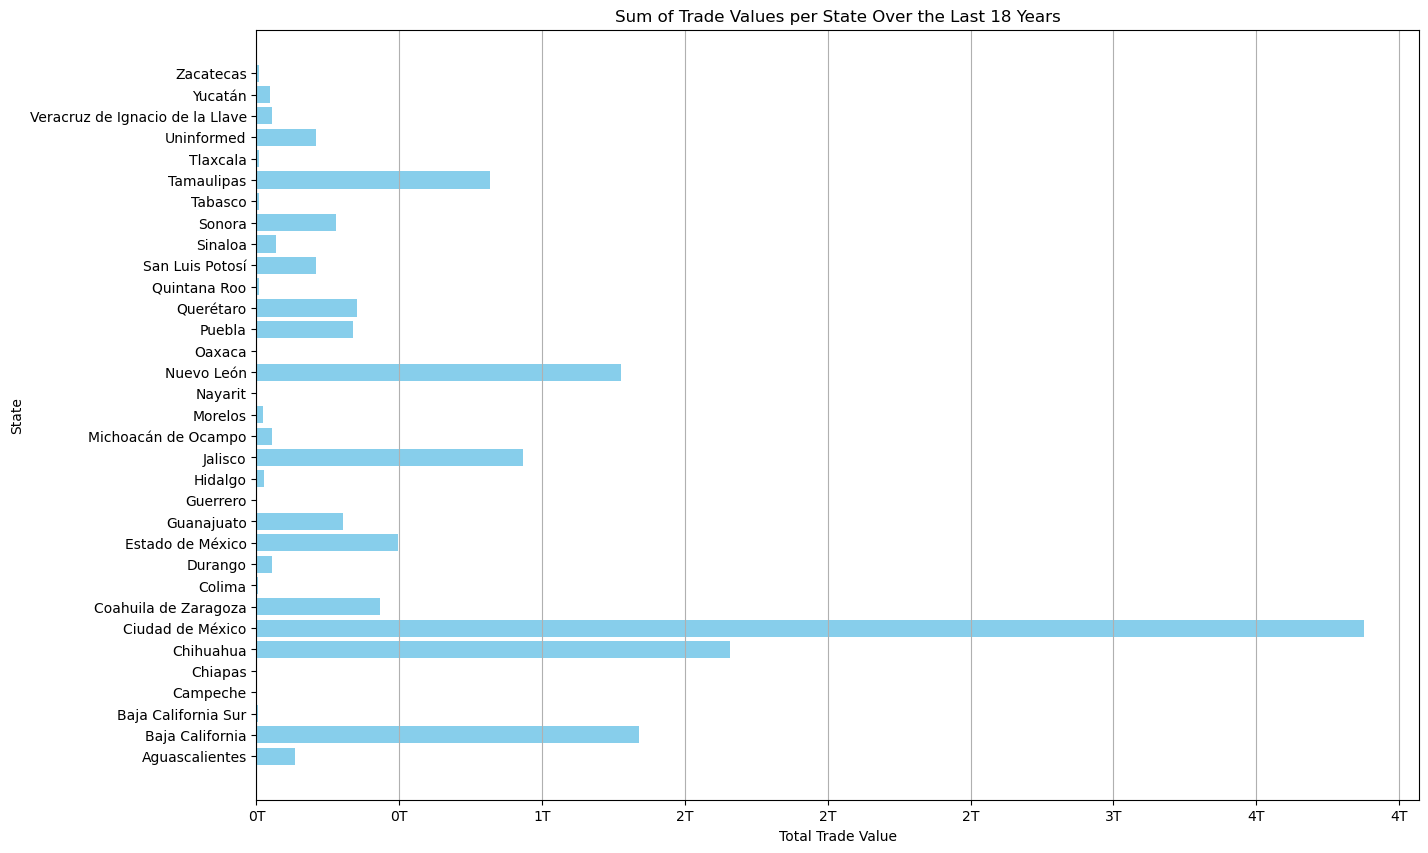

In [15]:
plt.figure(figsize=(15, 10))
bar_width = 5
plt.barh(grouped_df1['State'], grouped_df1['Trade Value'], color='skyblue')

# Setting the formatter directly using a lambda function
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x * 1e-12:.0f}T'))

plt.title('Sum of Trade Values per State Over the Last 18 Years')
plt.xlabel('Total Trade Value')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

In [16]:
grouped_df2 = df1.groupby('Chapter 2 Digit')['Trade Value'].sum().reset_index()

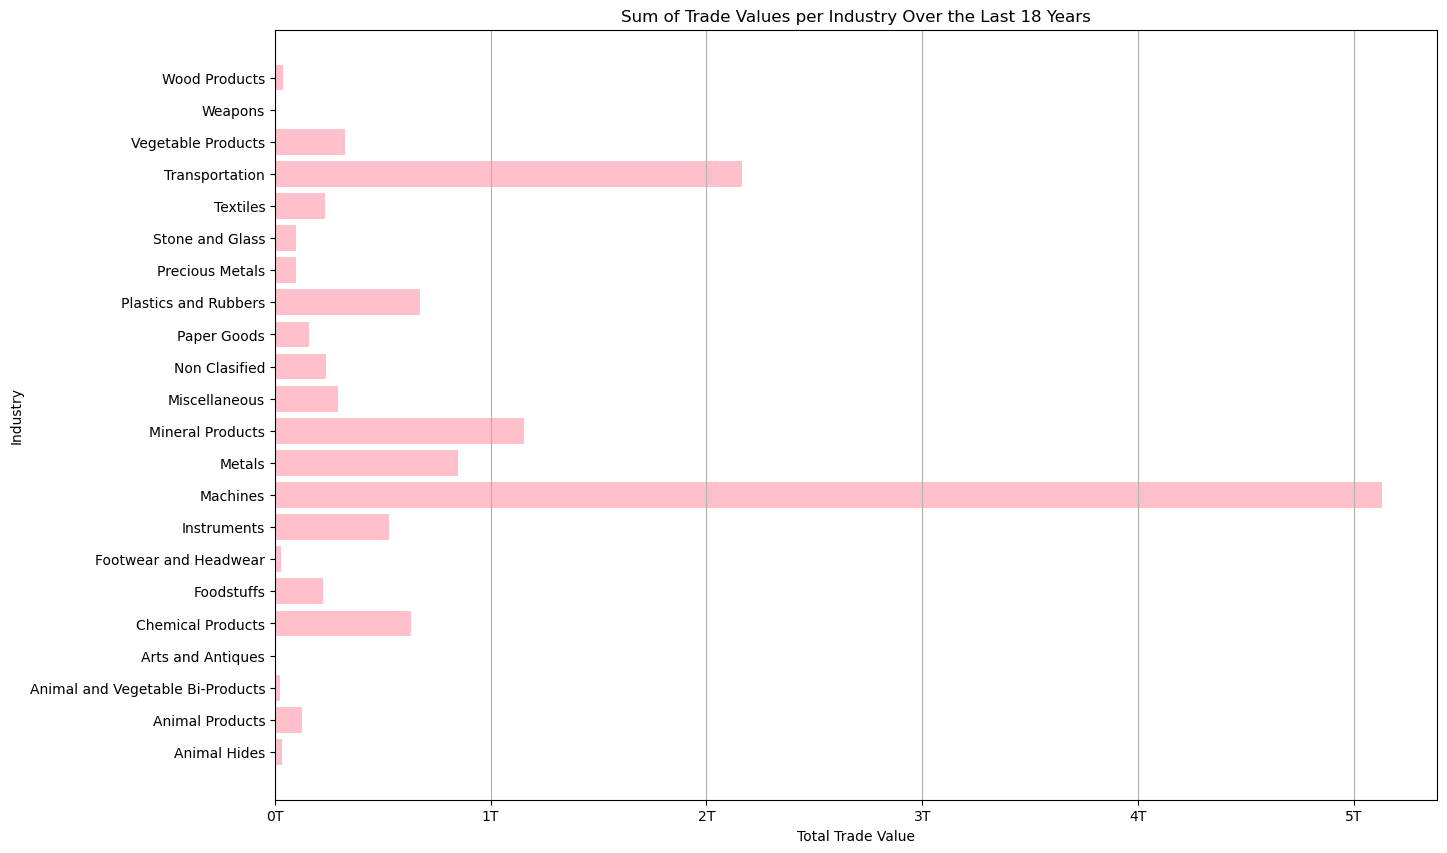

In [17]:
plt.figure(figsize=(15, 10))
bar_width = 5
plt.barh(grouped_df2['Chapter 2 Digit'], grouped_df2['Trade Value'], color='Pink')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x * 1e-12:.0f}T'))

plt.title('Sum of Trade Values per Industry Over the Last 18 Years')
plt.xlabel('Total Trade Value')
plt.ylabel('Industry')
plt.grid(axis='x')
plt.show()

In [43]:
# Sorting the DataFrame by Trade Value and selecting the top 10
sorted_grouped_df1 = grouped_df1.sort_values(by='Trade Value', ascending=False)
top_10_df1 = sorted_grouped_df1.head(15)

# Summing the Trade Values for the rest of the states
others_value_df1 = sorted_grouped_df1.iloc[15:]['Trade Value'].sum()

In [44]:
# Creating a new DataFrame for the pie chart
pie_data = top_10_df1.append(pd.DataFrame({'State': ['Others'], 'Trade Value': [others_value_df1]}))

/var/folders/hr/3ykqsg891cngjjlr30f5yspr0000gn/T/ipykernel_14791/3897978554.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_data = top_10_df1.append(pd.DataFrame({'State': ['Others'], 'Trade Value': [others_value_df1]}))


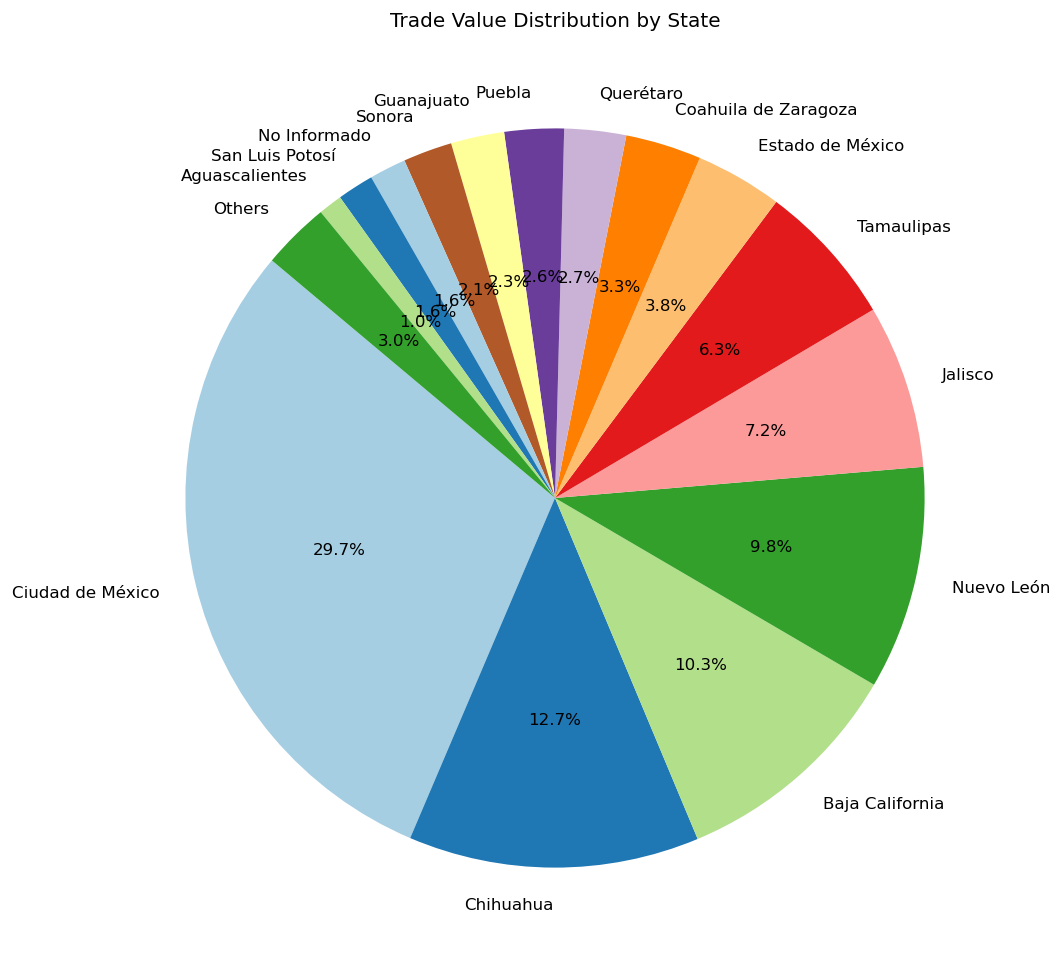

In [61]:
plt.figure(figsize=(20, 10),dpi=120)
plt.pie(pie_data['Trade Value'], labels=pie_data['State'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Trade Value Distribution by State')
plt.show()

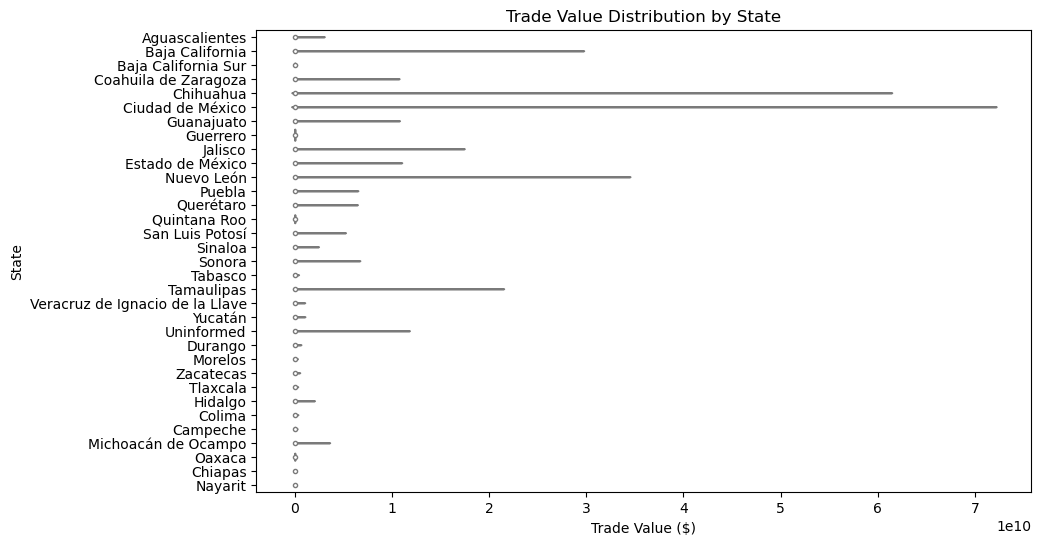

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Trade Value', y='State', data=df1, orient='h', palette="Pastel1")
plt.title('Trade Value Distribution by State')
plt.xlabel('Trade Value ($)')
plt.ylabel('State')
plt.show()

<Figure size 2000x1000 with 0 Axes>

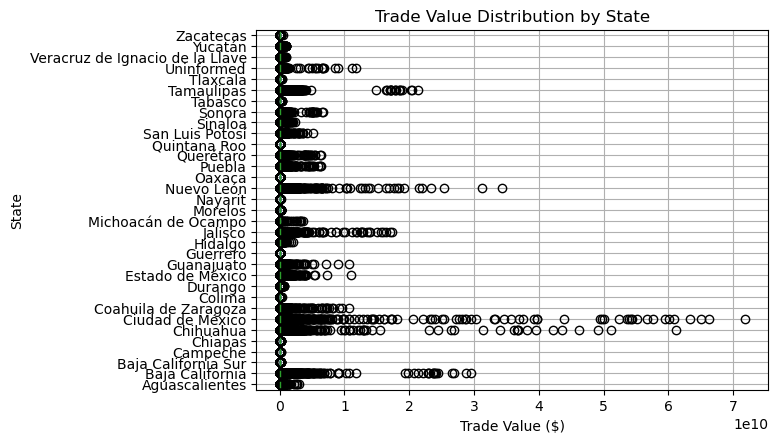

In [33]:
plt.figure(figsize=(20, 10))
df1.boxplot(by='State', column=['Trade Value'], vert=False)
plt.title('Trade Value Distribution by State')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by State' title
plt.ylabel('State')
plt.xlabel('Trade Value ($)')
plt.grid(True)
plt.show()

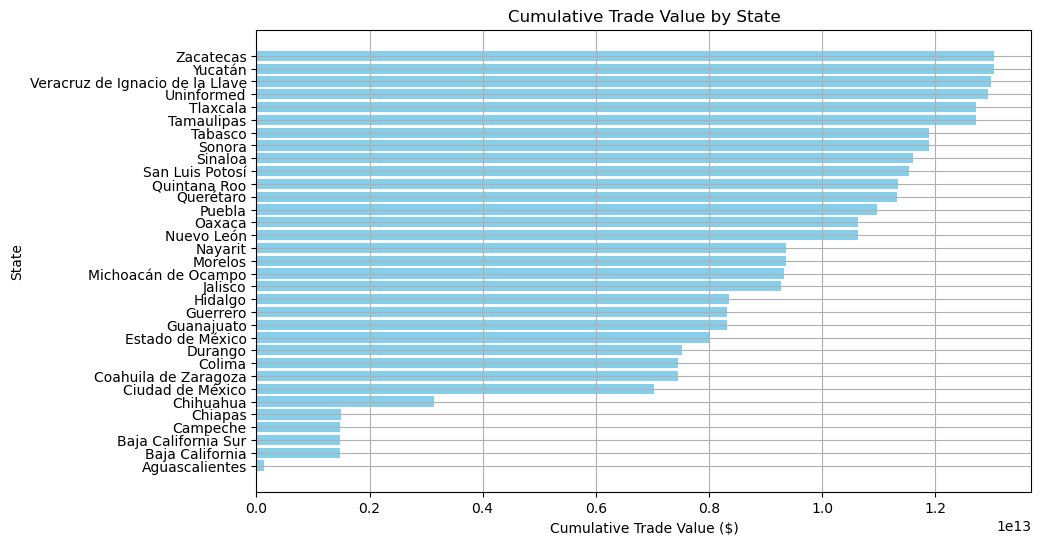

In [42]:
# Calculate cumulative trade value by state
df1_sorted = df1.groupby('State')['Trade Value'].sum().reset_index()
df1_sorted['Cumulative Trade Value'] = df1_sorted['Trade Value'].cumsum()

# Creating a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df1_sorted['State'], df1_sorted['Cumulative Trade Value'], color='skyblue')
plt.title('Cumulative Trade Value by State')
plt.xlabel('Cumulative Trade Value ($)')
plt.ylabel('State')
plt.grid(True)
plt.show()